# MATH 578 - Homework 2

You can find the source code for the *utils* and *q2* modules at:

https://github.com/selimb/schoolstuff/tree/master/math578/hw2

In [1]:
# Required imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import sympy as sp
import scipy.linalg as scilin
sp.init_printing()
%matplotlib inline

In [2]:
from utils import *

In [3]:
def newton_iter(x, f, fp):
    """
    A single (scalar) Newton method iteration.
    """
    return x - f(x)/fp(x)

def calc_err(a):
    """
    Calculate error. 
    
    Since we're trying to find a root, just returning the 
    euclidian norm of `a` is fine.
    """
    return np.linalg.norm(a)

def solve(iter_func, x0, f, fp, tol=1e-8, iter_max = 100):
    """
    Find root using Newton's method.
    
    Parameters
    ----------
    iter_func : func
        Function used to iterate. 
    x0 : float
        Initial guess for the root.
    f, fp : func
        Function and its derivative.
    tol : float, optional
        Tolerance.
    iter_max : int, optional
        Maximum number of iterations
        
    Returns
    -------
    all_x : list
        Progression of `x`. `x[-1]` should be the value of the root 
        with a given tolerance -- hopefully.
    all_err : list
        Progression of the absolute error. Should go to 0.
    """
    err = 1
    all_x = []
    all_err = []
    x = x0
    all_x.append(x0)
    all_err.append(calc_err(f(x0)))
    for i in range(iter_max):
        x1 = iter_func(x, f, fp)
        err = calc_err(f(x1))
        all_err.append(err)
        all_x.append(x1)
        x = x1
        if err < tol:
            break
    else:
        print('Maximum number of iterations reached.')
    return np.array(all_x), np.array(all_err)

## Question 1.

\begin{align}
f(x) &= \cos(x) - x\\
f\prime(x) &= -\sin(x) - 1
\end{align}

In [4]:
f = lambda x: np.cos(x) - x
fp = lambda x: -np.sin(x) - 1
x0 = -1

Let's visualize that function.

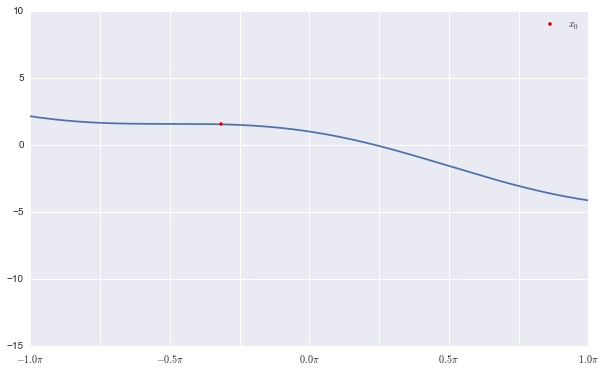

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(-10, 10, 1000)
plot_init(ax, x, f, x0)
pi_plot(ax, -1, 1)
plt.show()

This is obviously not an optimal starting point -- we're close to being on a saddle point. Were we directly on the saddle point, the root-finding algorithm would have to divide by 0 and we would not be able to proceed without picking another starting point.

### $x_0$ = -1

In [6]:
x0 = -1
all_x, all_err = solve(newton_iter, x0, f, fp)
disp.Latex(arr2tex(np.array([all_x, all_err]).T, ['$x_i$', '$||f(x_i)||_2$']))

<IPython.core.display.Latex object>

### Picture

Only with first 4 iterations.

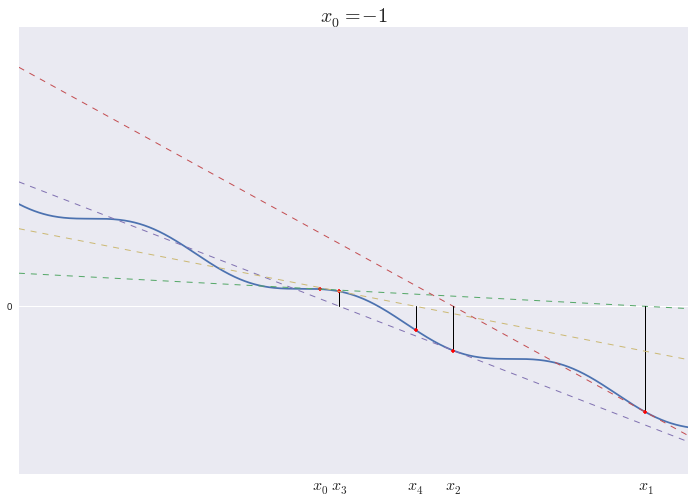

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_init(ax, x, f, x0, legend=False)
showoff(ax, all_x[:5], f, fp)
ax.set_title('$x_0 = -1$', fontsize=20)
plt.show()

### $x_0$ = $\pi/4$

In [8]:
x0 = np.pi/4
all_x, all_err = solve(newton_iter, x0, f, fp)
disp.Latex(arr2tex(np.array([all_x, all_err]).T, ['$x_i$', '$||f(x_i)||_2$']))

<IPython.core.display.Latex object>


We get to machine precision after 4 iterations with this new initial guess. It's easy to see that the accuracy doubles in magnitude at each iteration. 

We won't be plotting the derivatives for this one for obvious reasons.

## Question 2

In [9]:
np.set_printoptions(precision=7)

In [10]:
# Did some symbolic stuff here
from q2 import F, J

In [11]:
F()

<IPython.core.display.Math object>

In [12]:
J()

<IPython.core.display.Math object>

In [13]:
def newton_iter_2d(x, F, J):
    """
    A single (vector) Newton Method iteration.
    """
    return x - scilin.inv( J(x)).dot(F(x) ).flatten()

We can re-use our solve function!

In [14]:
x0 = [1, 1]
all_xy, all_err = solve(newton_iter_2d, x0, F, J, tol=1e-6)

In [15]:
disp.Latex(arr2tex(
    np.vstack([all_xy.T, all_err]).T,
    ['$x$', '$y$', '$||F(x, y)||_2$']
))

<IPython.core.display.Latex object>

Picture is a tiny bit more complicated in this case. 

We notice the quadratic convergence in action yet again!

## Question 3 -- confirming results

### a)

In [16]:
M = np.array([
    [4, 1],
    [1, 4],
])
disp.Latex('$||M||_2 = %.1f$' % scilin.norm(M, ord=2))

<IPython.core.display.Latex object>

In [17]:
disp.Latex(r'$\rho (M) = %r$' % max(scilin.eigvals(M)))

<IPython.core.display.Latex object>

### b)

In [18]:
U = np.sqrt(1.0/5.0)*np.array([[2, 1], [1, -2]])
D = np.diag((7, 3))
V = np.sqrt(1.0/2.0)*np.array([[1, 1], [1, -1]])
M = U.dot(D).dot(V)
disp.Latex('$||M||_2 = %.1f$' % scilin.norm(M, ord=2))

<IPython.core.display.Latex object>

In [19]:
disp.Latex(r'$\rho (M) = %r$' % max(scilin.eigvals(M)))

<IPython.core.display.Latex object>